ANALYSING UNEMPLOTMENT RATE USING PYTHON

CSV FILES USED: Unemployment.csv and Unemployment_Rate_upto_11_2020.csv

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [7]:
#change coloum name for understanding
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [8]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [10]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [12]:

print(df.isnull().sum())

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64


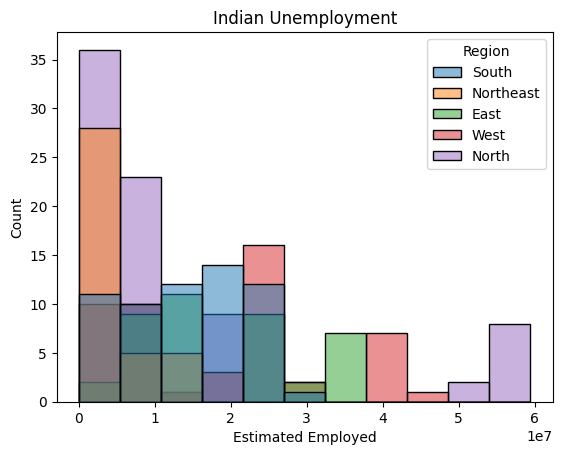

In [13]:
#visualize the data to analyze the unemployment rate. estimated number of employees according to different regions of India:
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)
plt.show()

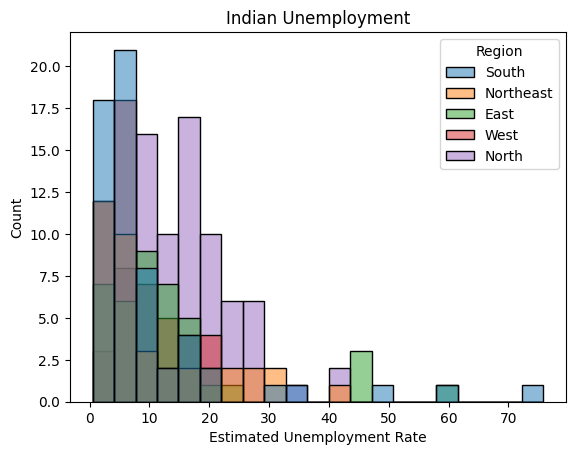

In [14]:


plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

<ipython-input-30-621ea264bb0a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-30-621ea264bb0a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


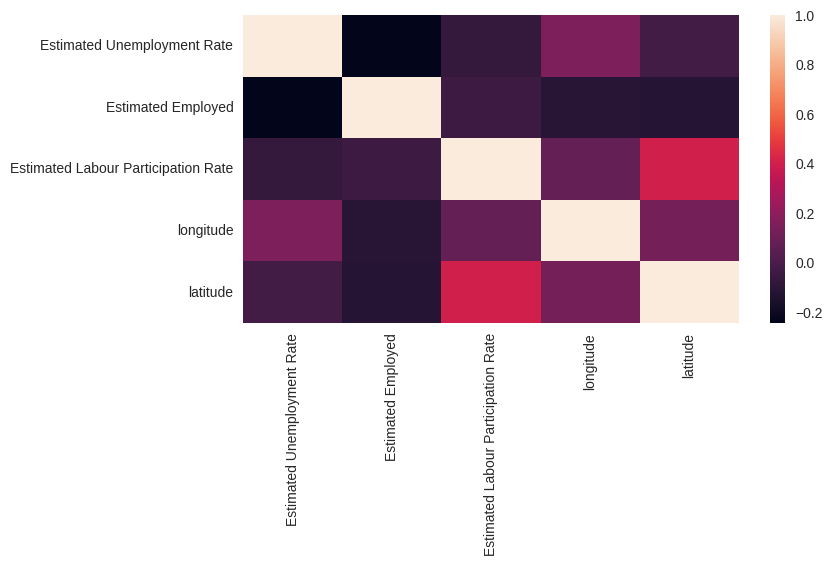

In [30]:

plt.style.use('seaborn')
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr())
plt.show()

In [17]:
x= df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'latitude']]

y = df['Estimated Employed']

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [24]:
x_train


,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
215,5.00,23025845,36.77,11.1271,78.6569
155,2.10,1448106,62.96,25.4670,91.3662
167,2.10,13608422,38.63,20.9517,85.0985
80,16.83,2287632,45.50,31.1048,77.1734
224,5.79,18185429,60.59,18.1124,79.0193
...,...,...,...,...,...
122,16.99,3933276,16.77,10.8505,76.2711
95,10.88,3558889,38.03,33.7782,76.5762
25,17.82,23963933,36.86,25.0961,85.3131
29,9.82,25693252,35.70,25.0961,85.3131


In [25]:
x_train.shape

(186, 5)

In [26]:
y_train
y_train.shape


(186,)

In [31]:

from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
predictions = lr.predict(x_test)

In [39]:
from sklearn import metrics

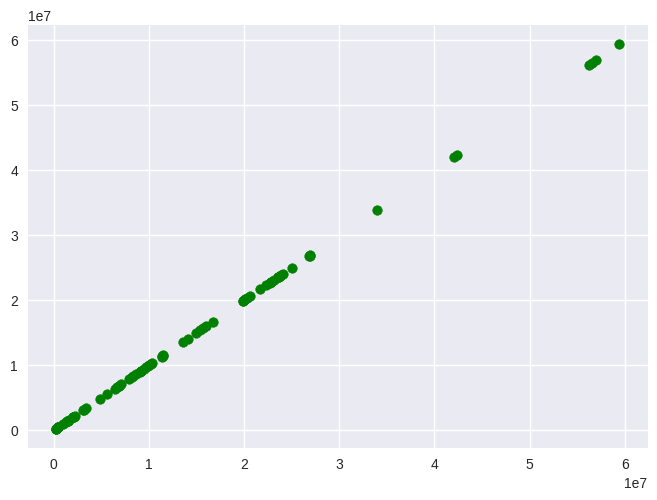

In [52]:
from sklearn.metrics import accuracy_score
plt.scatter(y_test, predictions,color="green")
